# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV799"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP041036, SRP027015, SRP041819, SRP061329, SRP018838, SRP021509, SRP020491, SRP050499, SRP051320, SRP052740, SRP064464, SRP055569, SRP060416, SRP014428, SRP011578, SRP057196, SRP040577, SRP063840, SRP059039, SRP029739, SRP016003, SRP030617, SRP055390, SRP008930, SRP020492, SRP007885, SRP022260, SRP058773, SRP032754, SRP019241, SRP060355, SRP043339, SRP033393, SRP045711, SRP042218, SRP059057, SRP001540, SRP028301, SRP048577, SRP042161, SRP007525, SRP048660, SRP029889, SRP001563, SRP007461, SRP043078, SRP056696, SRP055009, SRP047476, SRP039694, SRP061241, SRP055675, SRP050551, SRP030041, SRP012461, SRP048820, SRP057205, SRP066834, SRP013450, SRP014688, SRP012557, SRP018853, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (60 != 62)
  warnings.warn(


In [18]:
lv_data.shape

(6504, 98)

In [19]:
lv_data.head()

tissue source cell line treatment timepoint  \
project   run                                                      
SRP041036 SRR1223541   bone marrow      JJN3   Control       4hr   
          SRR1223542   bone marrow      JJN3   LBH.589       4hr   
          SRR1223543   bone marrow      JJN3     5.AZA       4hr   
          SRR1223544   bone marrow      JJN3     Combo       4hr   
          SRR1223545   bone marrow      JJN3       NMP       4hr   

                     cycloheximide time point sample type cell type phenotype  \
project   run                                                                   
SRP041036 SRR1223541           NaN        NaN         NaN       NaN       NaN   
          SRR1223542           NaN        NaN         NaN       NaN       NaN   
          SRR1223543           NaN        NaN         NaN       NaN       NaN   
          SRR1223544           NaN        NaN         NaN       NaN       NaN   
          SRR1223545           NaN        NaN         NaN       NaN       NaN   

                     passage  ... ssea4 tra160 Stage antibody vendor/catalog#  \
project   run                 ...                                               
SRP041036 SRR1223541     NaN  ...   NaN    NaN   NaN                      NaN   
          SRR1223542     NaN  ...   NaN    NaN   NaN                      NaN   
          SRR1223543     NaN  ...   NaN    NaN   NaN                      NaN   
          SRR1223544     NaN  ...   NaN    NaN   NaN                      NaN   
          SRR1223545     NaN  ...   NaN    NaN   NaN                      NaN   

                     directional rnaseq experiment individual assay status  \
project   run                                                                
SRP041036 SRR1223541                NaN        NaN        NaN   NaN    NaN   
          SRR1223542                NaN        NaN        NaN   NaN    NaN   
          SRR1223543                NaN        NaN        NaN   NaN    NaN   
          SRR1223544                NaN        NaN        NaN   NaN    NaN   
          SRR1223545                NaN        NaN        NaN   NaN    NaN   

                         LV799  
project   run                   
SRP041036 SRR1223541  0.301096  
          SRR1223542  0.263358  
          SRR1223543  0.235380  
          SRR1223544  0.236506  
          SRR1223545  0.208384  

[5 rows x 98 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

tissue source         0.697671
timepoint             0.697671
treatment             0.144082
cell line             0.089638
cycloheximide         0.068640
sample type           0.038576
passage               0.030872
time point            0.017055
phenotype             0.014467
overexpression        0.010219
labexpid              0.008908
condition             0.005233
assigned cell type    0.004164
ercc_dilution         0.004164
ercc_mix              0.004164
qc pass               0.004164
cell count            0.004164
individual            0.003890
assay                 0.003890
genotype/variation    0.003701
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.002308
tissue       0.001219
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "tissue source",
        "cell line",
        "cell type",
        "tissue",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [24]:
_tmp_seq[2]

tissue source cell line            cell type tissue  \
project   run                                                              
SRP061329 SRR2107337           NaN    MOLP-8                  NaN    NaN   
          SRR2107336           NaN    MOLP-8                  NaN    NaN   
          SRR2107335           NaN    MOLP-8                  NaN    NaN   
SRP041036 SRR1223572   bone marrow      JJN3                  NaN    NaN   
SRP027015 SRR931822            NaN       NaN                  NaN    NaN   
SRP041036 SRR1223594   bone marrow      JJN3                  NaN    NaN   
          SRR1223573   bone marrow      JJN3                  NaN    NaN   
          SRR1223551   bone marrow      JJN3                  NaN    NaN   
          SRR1223591   bone marrow      JJN3                  NaN    NaN   
          SRR1223575   bone marrow      JJN3                  NaN    NaN   
SRP020491 SRR805752            NaN       NaN  circulating B cells    NaN   
SRP041036 SRR1223555   bone marrow      JJN3                  NaN    NaN   
          SRR1223561   bone marrow      JJN3                  NaN    NaN   
          SRR1223595   bone marrow      JJN3                  NaN    NaN   
          SRR1223541   bone marrow      JJN3                  NaN    NaN   
SRP027015 SRR931815            NaN       NaN                  NaN    NaN   
SRP050499 SRR2013650           NaN       NaN                  NaN    NaN   
SRP018838 SRR764786            NaN   GM12878                  NaN    NaN   
SRP051320 SRR1723088           NaN      LP-1                  NaN    NaN   
SRP041036 SRR1223553   bone marrow      JJN3                  NaN    NaN   
SRP051320 SRR1723091           NaN      LP-1                  NaN    NaN   
SRP041036 SRR1223593   bone marrow      JJN3                  NaN    NaN   
SRP051320 SRR1723092           NaN      LP-1                  NaN    NaN   
SRP052740 SRR1768898           NaN       NaN             melanoma    NaN   
SRP051320 SRR1723086           NaN      LP-1                  NaN    NaN   

                         LV799  
project   run                   
SRP061329 SRR2107337  0.360735  
          SRR2107336  0.351320  
          SRR2107335  0.349604  
SRP041036 SRR1223572  0.348948  
SRP027015 SRR931822   0.347864  
SRP041036 SRR1223594  0.343060  
          SRR1223573  0.331773  
          SRR1223551  0.327182  
          SRR1223591  0.318520  
          SRR1223575  0.317625  
SRP020491 SRR805752   0.314099  
SRP041036 SRR1223555  0.306255  
          SRR1223561  0.303568  
          SRR1223595  0.302896  
          SRR1223541  0.301096  
SRP027015 SRR931815   0.298945  
SRP050499 SRR2013650  0.295602  
SRP018838 SRR764786   0.290846  
SRP051320 SRR1723088  0.288261  
SRP041036 SRR1223553  0.287861  
SRP051320 SRR1723091  0.287646  
SRP041036 SRR1223593  0.287473  
SRP051320 SRR1723092  0.287081  
SRP052740 SRR1768898  0.286241  
SRP051320 SRR1723086  0.285515

In [25]:
# what is there in these projects?
lv_data.loc[["SRP027015"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

cycloheximide      time point  \
project   run                                                  
SRP027015 SRR931814                     none  0h (untreated)   
          SRR931816                     none            1.5h   
          SRR931818                     none              3h   
          SRR931820                     none              6h   
          SRR931822                     none              9h   
          SRR931815  0.1 mg/mL cycloheximide  0h (untreated)   
          SRR931819  0.1 mg/mL cycloheximide              3h   
          SRR931824                     none             12h   
          SRR931821  0.1 mg/mL cycloheximide              6h   
          SRR931817  0.1 mg/mL cycloheximide            1.5h   

                            sample type     LV799  
project   run                                      
SRP027015 SRR931814        poly(A) mRNA  0.799245  
          SRR931816        poly(A) mRNA  0.740098  
          SRR931818        poly(A) mRNA  0.650010  
          SRR931820        poly(A) mRNA  0.410846  
          SRR931822        poly(A) mRNA  0.347864  
          SRR931815  ribosome footprint  0.298945  
          SRR931819  ribosome footprint  0.246081  
          SRR931824        poly(A) mRNA  0.214638  
          SRR931821  ribosome footprint  0.177244  
          SRR931817  ribosome footprint  0.174359

In [26]:
SELECTED_ATTRIBUTE = "tissue source"

In [27]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["cell type", "cell line"]

## Get plot data

In [47]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [48]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [49]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [50]:
plot_data.head(20)

tissue source     LV799
project   run                                   
SRP041036 SRR1223586  peripheral blood  2.395650
          SRR1223576  peripheral blood  2.364392
          SRR1223566  peripheral blood  2.310441
          SRR1223596  peripheral blood  2.268940
          SRR1223587  peripheral blood  2.178015
          SRR1223588  peripheral blood  2.169669
          SRR1223578  peripheral blood  2.162259
          SRR1223568  peripheral blood  2.157781
          SRR1223546  peripheral blood  2.148394
          SRR1223598  peripheral blood  2.118455
          SRR1223590  peripheral blood  2.077341
          SRR1223570  peripheral blood  2.060424
          SRR1223556  peripheral blood  2.045684
          SRR1223558  peripheral blood  2.013075
          SRR1223548  peripheral blood  1.941864
          SRR1223567  peripheral blood  1.921841
          SRR1223589  peripheral blood  1.921836
          SRR1223550  peripheral blood  1.789092
          SRR1223547  peripheral blood  1.777438
          SRR1223597  peripheral blood  1.728821

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [51]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [52]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [53]:
_srp_code = "SRP027015"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Peripheral blood (MM.1S)",
    # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [54]:
_srp_code = "SRP061329"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Peripheral blood"
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [55]:
_srp_code = "SRP041036"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [56]:
_srp_code = "SRP018838"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Blood"
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [57]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [58]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [59]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [60]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [61]:
len(attr_order)

15

In [62]:
attr_order[:5]

['Peripheral blood (U266)',
 'Peripheral blood (MM.1S)',
 'Multiple myeloma',
 'Peripheral blood (MOLP-8)',
 'Blood (GM12878)']

## Plot

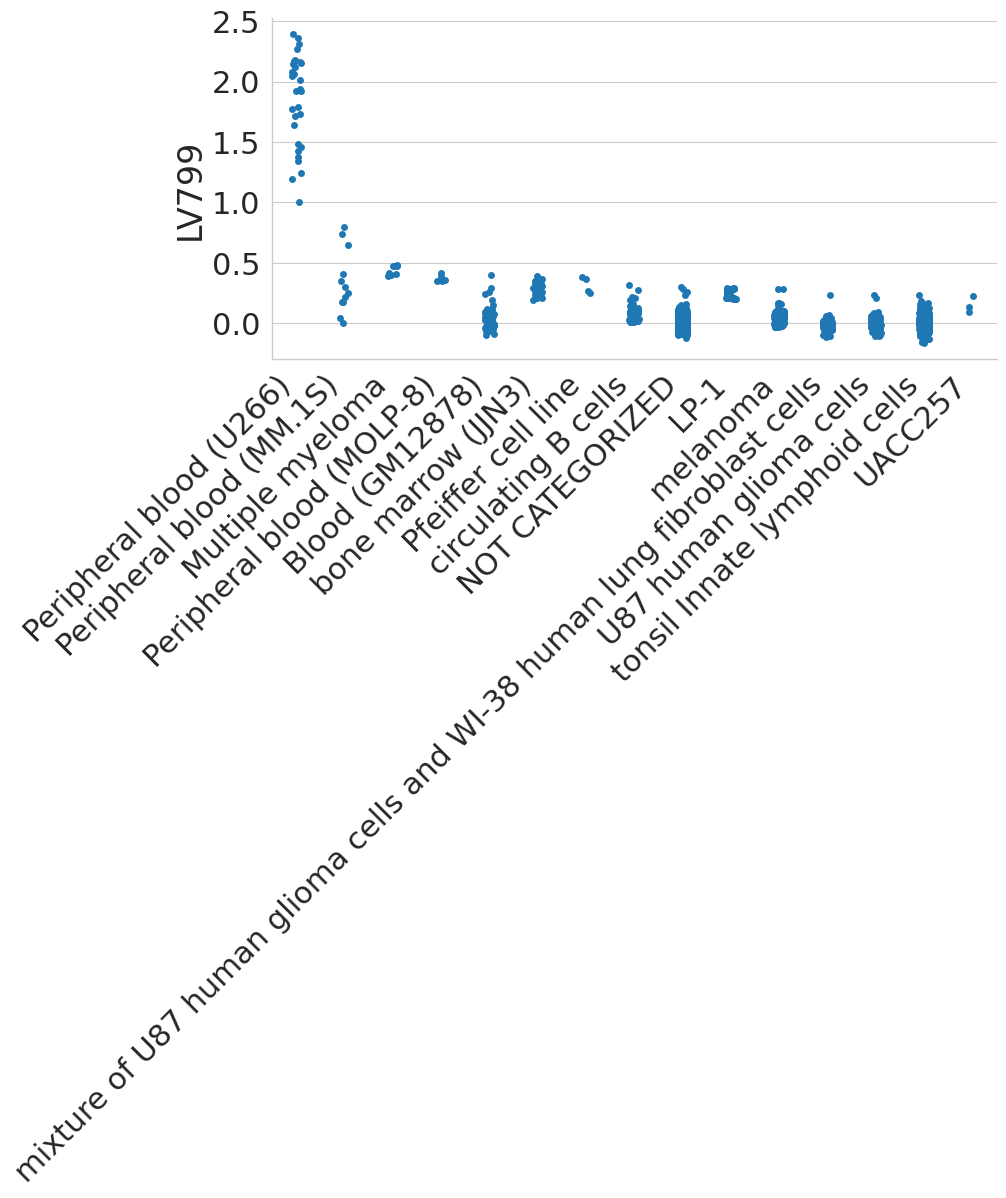

In [63]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [44]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [45]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("^Peripheral blood$")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

tissue source     LV799
project   run                                   
SRP041036 SRR1223586  Peripheral blood  2.395650
          SRR1223576  Peripheral blood  2.364392
          SRR1223566  Peripheral blood  2.310441
          SRR1223596  Peripheral blood  2.268940
          SRR1223587  Peripheral blood  2.178015
          SRR1223588  Peripheral blood  2.169669
          SRR1223578  Peripheral blood  2.162259
          SRR1223568  Peripheral blood  2.157781
          SRR1223546  Peripheral blood  2.148394
          SRR1223598  Peripheral blood  2.118455
          SRR1223590  Peripheral blood  2.077341
          SRR1223570  Peripheral blood  2.060424
          SRR1223556  Peripheral blood  2.045684
          SRR1223558  Peripheral blood  2.013075
          SRR1223548  Peripheral blood  1.941864
          SRR1223567  Peripheral blood  1.921841
          SRR1223589  Peripheral blood  1.921836
          SRR1223550  Peripheral blood  1.789092
          SRR1223547  Peripheral blood  1.777438
          SRR1223597  Peripheral blood  1.728821

In [46]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP041036"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

tissue source cell line treatment timepoint     LV799
project   run                                                                 
SRP041036 SRR1223586  peripheral blood      U266   Control       4hr  2.395650
          SRR1223576  peripheral blood      U266   Control      24hr  2.364392
          SRR1223566  peripheral blood      U266   Control       4hr  2.310441
          SRR1223596  peripheral blood      U266   Control      24hr  2.268940
          SRR1223587  peripheral blood      U266   LBH.589       4hr  2.178015
          SRR1223588  peripheral blood      U266     5.AZA       4hr  2.169669
          SRR1223578  peripheral blood      U266     5.AZA      24hr  2.162259
          SRR1223568  peripheral blood      U266     5.AZA       4hr  2.157781
          SRR1223546  peripheral blood      U266   Control       4hr  2.148394
          SRR1223598  peripheral blood      U266     5.AZA      24hr  2.118455
          SRR1223590  peripheral blood      U266       NMP       4hr  2.077341
          SRR1223570  peripheral blood      U266       NMP       4hr  2.060424
          SRR1223556  peripheral blood      U266   Control      24hr  2.045684
          SRR1223558  peripheral blood      U266     5.AZA      24hr  2.013075
          SRR1223548  peripheral blood      U266     5.AZA       4hr  1.941864
          SRR1223567  peripheral blood      U266   LBH.589       4hr  1.921841
          SRR1223589  peripheral blood      U266     Combo       4hr  1.921836
          SRR1223550  peripheral blood      U266       NMP       4hr  1.789092
          SRR1223547  peripheral blood      U266   LBH.589       4hr  1.777438
          SRR1223597  peripheral blood      U266   LBH.589      24hr  1.728821
          SRR1223569  peripheral blood      U266     Combo       4hr  1.719120
          SRR1223549  peripheral blood      U266     Combo       4hr  1.643743
          SRR1223560  peripheral blood      U266       NMP      24hr  1.486141
          SRR1223600  peripheral blood      U266       NMP      24hr  1.459566
          SRR1223599  peripheral blood      U266     Combo      24hr  1.422495
          SRR1223580  peripheral blood      U266       NMP      24hr  1.371934
          SRR1223577  peripheral blood      U266   LBH.589      24hr  1.346695
          SRR1223557  peripheral blood      U266   LBH.589      24hr  1.244656
          SRR1223579  peripheral blood      U266     Combo      24hr  1.194364
          SRR1223559  peripheral blood      U266     Combo      24hr  0.999512
          SRR1223552       bone marrow      JJN3   LBH.589      24hr  0.392923
          SRR1223571       bone marrow      JJN3   Control      24hr  0.363082
          SRR1223592       bone marrow      JJN3   LBH.589      24hr  0.362394
          SRR1223572       bone marrow      JJN3   LBH.589      24hr  0.348948
          SRR1223594       bone marrow      JJN3     Combo      24hr  0.343060
          SRR1223573       bone marrow      JJN3     5.AZA      24hr  0.331773
          SRR1223551       bone marrow      JJN3   Control      24hr  0.327182
          SRR1223591       bone marrow      JJN3   Control      24hr  0.318520
          SRR1223575       bone marrow      JJN3       NMP      24hr  0.317625
          SRR1223555       bone marrow      JJN3       NMP      24hr  0.306255
          SRR1223561       bone marrow      JJN3   Control       4hr  0.303568
          SRR1223595       bone marrow      JJN3       NMP      24hr  0.302896
          SRR1223541       bone marrow      JJN3   Control       4hr  0.301096
          SRR1223553       bone marrow      JJN3     5.AZA      24hr  0.287861
          SRR1223593       bone marrow      JJN3     5.AZA      24hr  0.287473
          SRR1223563       bone marrow      JJN3     5.AZA       4hr  0.278371
          SRR1223542       bone marrow      JJN3   LBH.589       4hr  0.263358
          SRR1223581       bone marrow      JJN3   Control       4hr  0.259528
          SRR1223562       bone marrow      JJN3   LBH.589       4hr  0.255

In [62]:
_tmp.iloc[0]["sample type"]

'poly(A) mRNA'

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )